# W = 3 L = 60

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('leg3.xlsx')

In [4]:
df.head()

,truncation_error,E,Ndown_total,Nup_total,add
0,0.000000e+00,-3.411562,0,1,1
1,2.775558e-17,-6.815175,0,2,1
2,7.372575e-18,-10.205564,0,3,1
3,-1.713378e-16,-13.577489,0,4,1
4,-2.488660e-17,-16.925758,0,5,1


## PP - FP

In [19]:
points_1 = list(range(2,19))+list(range(20,180,5))+[179]

In [20]:
mu1, h1 = [], []
for i in points_1:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/(-2)
    mu1.append(mu)
    h1.append(h)

## ED - PP (Досчитать E(106,104))

In [27]:
points_2 = list(range(1,53))+list(range(55,105,5))+list(range(110,180,5))+[179]

In [29]:
mu2, h2 = [], []
for i in points_2:
    mu = (df1[(df1['Nup_total']==i+1) & (df1['Ndown_total']==i+1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==i)]['E'].values[0])/2
    h = (df1[(df1['Nup_total']==i+1) & (df1['Ndown_total']==i-1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==i)]['E'].values[0])/2
    mu2.append(mu)
    h2.append(h)

## Прямые линии

In [30]:
e11 = df1[(df1['Nup_total']==1) & (df1['Ndown_total']==1)]['E'].values[0]
e10 = df1[(df1['Nup_total']==1) & (df1['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

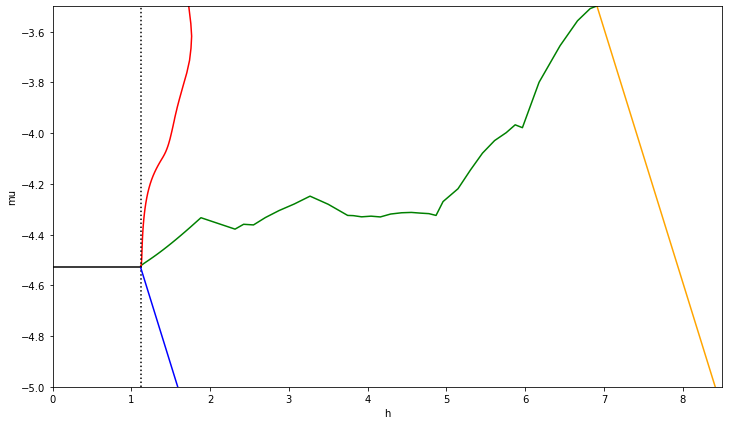

In [33]:
plt.figure(figsize=(12, 7))
plt.plot(h1, mu1, '-', color='green')
plt.plot(h2, mu2, '-', color='red')
plt.axis([0, 8.5, -5, -3.5])
plt.axhline(y=(e11/2), color='black', xmax = h1[0]/8.5)
plt.axvline(x=h1[0], linestyle=':', color='black')
plt.plot(h, mu(h), '-', color = 'blue')
plt.plot(h3, mu3(h3), '-', color = 'orange')
plt.xlabel('h')
plt.ylabel('mu')
plt.show()